# Convolutional Neural Network

### Importing the libraries

In [1]:
pip install keras==2.6.*

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [4]:
tf.__version__

'2.9.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [7]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [11]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [48]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
250/250 [==============================] - 46s 185ms/step - loss: 0.2157 - accuracy: 0.9125 - val_loss: 0.5234 - val_accuracy: 0.7975
Epoch 2/15
250/250 [==============================] - 43s 174ms/step - loss: 0.1965 - accuracy: 0.9226 - val_loss: 0.5340 - val_accuracy: 0.8105
Epoch 3/15
250/250 [==============================] - 45s 179ms/step - loss: 0.1850 - accuracy: 0.9254 - val_loss: 0.6110 - val_accuracy: 0.8045
Epoch 4/15
250/250 [==============================] - 47s 188ms/step - loss: 0.1824 - accuracy: 0.9298 - val_loss: 0.5903 - val_accuracy: 0.8065
Epoch 5/15
250/250 [==============================] - 48s 192ms/step - loss: 0.1680 - accuracy: 0.9329 - val_loss: 0.5723 - val_accuracy: 0.8030
Epoch 6/15
250/250 [==============================] - 49s 195ms/step - loss: 0.1656 - accuracy: 0.9360 - val_loss: 0.6069 - val_accuracy: 0.8055
Epoch 7/15
250/250 [==============================] - 43s 170ms/step - loss: 0.1604 - accuracy: 0.9384 - val_loss: 0.6169 - val_ac

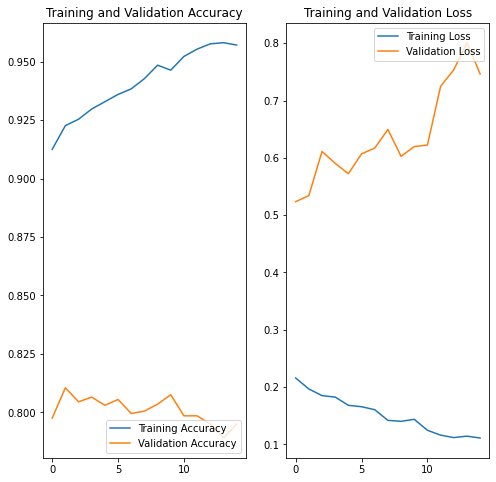

In [50]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Part 4 - Making a single prediction

In [59]:
import numpy as np


test_image = image.load_img('dataset/single_prediction/cat_or_dog_4.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

print(result[0][0])

if result[0][0] == 1.0:
    prediction = 'dog'
else:
    prediction = 'cat'

1.0


In [60]:
print(prediction)

dog
